In [1]:
### IMPORT DEPENDENCIES

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import numpy as np
import pandas as pd
import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
### BUILD ENGINE FOR SQLite DB CONSTRUCTION & CONNECTION

# CREATE THE ENGINE & CONNECT IT TO YOUR SQLite DATABASE
engine = create_engine("sqlite:///hawaii.sqlite")

# SET YOUR DATA BASE
Base = automap_base()

# REFLECT & THUS EFFECTIVE DECOUPLE OUR DATA using .prepare()
Base.prepare(engine, reflect=True)

In [3]:
# CHECK TO SEE THAT base.prepare() PROPERLY FOUND ALL OF OUR SQLite DATA 
# & CREATE/GLIMPSE AT DEVELOPED CLASSES[prev. data columns] 
# USING Base.classes & .keys()
Base.classes.keys()

['measurement', 'station']

In [4]:
# ESTABLISH/INITIALIZE Reference Variables FOR ACCESSING CLASSES BETTER
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# CREATE Session FUNCTION & LINK
# THis runs the action of establishing a connection 
# and engine session for our SQLiet queries
# Think of this like turning on the device [our SQLite Database] to use
session = Session(engine)

In [53]:
# THIS IS THE TIME BASED ON 365 days (1YEAR) BEFORE THE PROJECT-RELEVANT DATE
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

prev_year

datetime.date(2016, 8, 23)

In [7]:
results = []

In [8]:
results = session.query(Measurement.date, Measurement.prcp)

In [9]:
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [10]:
# WE ONLY WANT TO SEE THE MOST RECENT DATA
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [11]:
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [12]:
# CREATE A DATAFRAME FROM THE "results" DATA
# SET YOUR COLUMN VARIABLES
df = pd.DataFrame(results, columns=['date', 'precipitation'])

In [13]:
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [14]:
# WE WANT DATE AS OUR INDEX, SO WE USE THE set_index() FUNCTION FOR THE 'date' COLUMN
# SET inplace=True to opt to not create a new DataFrame | SET inplace=False to generate a new DataFrame

df.set_index(df['date'], inplace=True)

In [15]:
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [16]:
# SET THE DATAFRAME TO STRINGS, THEN PRINT THE DATAFRAME WITHOUT THE INDEX
# RUNNING THIS CODE TURNS YOUR DF INTO A STRING WHICH COULD MAKE IT UNINTERACTABLE!!
# df.to_string(index=False)

In [21]:
df = df.sort_index()
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [22]:
# PRINT OUR SORTED LIST
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

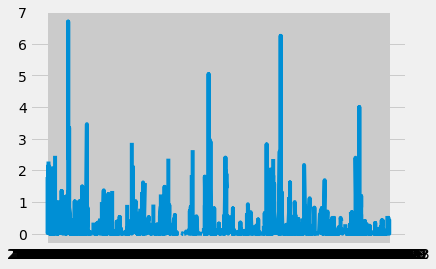

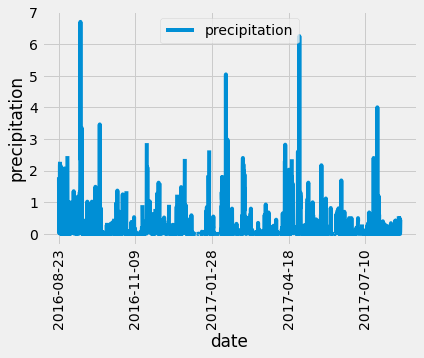

In [29]:
# Plot the data:

plt.plot(df['date'], df['precipitation'])

# OR

df.plot()
    #Rotate x ticks:
plt.xlabel("date")
plt.ylabel("precipitation")
plt.xticks(rotation=90)

In [30]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [36]:
# START A SESSION, WE WANT TO GROUP OUR # OF STATION REPORTS DATA BY STATION
# & PRINT THE COUNT OF STATIONS AND ORDER IT IN DESCENDING ORDER
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# START A SESSION, WE WANT TO FIGURE OUT THE TEMPERATURE STATISTICS
# ON A PARTICULAR STATION (WE"RE SEARCHING FOR Temp. MIN, MAX, & AVG)
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [43]:
# WE WANT TO DELIVER ALL OF OUR RESULTS IN A VISUALIZED FORMAT 
# FOR STAKEHOLDERS

# SET A REFERABLE VARIABLE FOR INSTANT ACCESS TO OUR QUERIED DATA
# USE .\ TO APPLY QUERY FILTERS
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [44]:
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [47]:
U_Station = pd.DataFrame(results, columns=['tobs'])

# RUN YOUR CODE
# USE
U_Station
# OR
# print(U_Station)

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


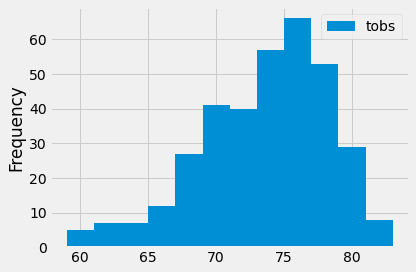

In [52]:
# WE SHOULD OUR DATA IN A PLOT, SO LETS PUT U_Station IN A 12 BIN PLOT
U_Station.plot.hist(bins=12)

# IF WE APPLY .tight_layout() to plot with more viewable tick data
plt.tight_layout()